In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('./introduction.ipynb'))))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ylearn.estimator_model.causal_tree import CausalTree
from ylearn.exp_dataset.exp_data import sq_data
from ylearn.utils._common import to_df

In [3]:
n = 2000
d = 10     
n_x = 1
y, x, v = sq_data(n, d, n_x)

true_te = lambda X: np.hstack([X[:, [0]]**2 + 1, np.ones((X.shape[0], n_x - 1))])

v_test = v[:min(100, n)].copy()
v_test[:, 0] = np.linspace(np.percentile(v[:, 0], 1), np.percentile(v[:, 0], 99), min(100, n))

In [4]:
data = to_df(treatment=x, outcome=y, v=v)
test_data = to_df(v=v_test)

outcome = 'outcome'
treatment = 'treatment'
adjustment = data.columns[2:]

In [31]:
ct = CausalTree(random_state=20, min_samples_leaf=10, max_depth=25, min_impurity_decrease=1e-10)
ct.fit(
    data=data,
    outcome=outcome,
    treatment=treatment,
    adjustment=adjustment
)
ct_pred = ct.estimate(data=test_data)

10-19 13:34:33 I ylearn.e.causal_tree.py 560 - Start building the causal tree with criterion HonestCMSE
10-19 13:34:33 I ylearn.e.causal_tree.py 576 - Building the causal tree with splitter BestSplitter
10-19 13:34:33 I ylearn.e.causal_tree.py 606 - Building the causal tree with builder DepthFirstTreeBuilder
10-19 13:34:33 I ylearn.e.causal_tree.py 638 - Start estimating the causal effect with the type of None.


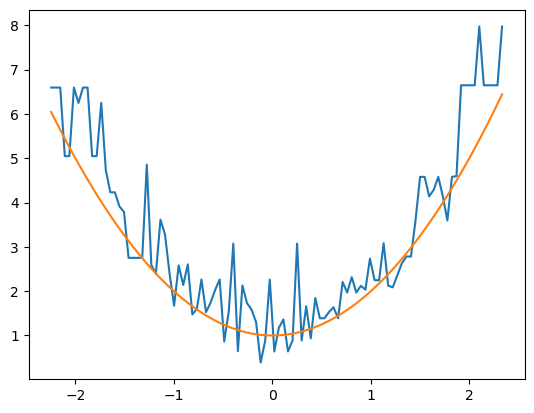

In [33]:
for t in range(n_x):
    plt.plot(v_test[:, 0], ct_pred[:, t])
    plt.plot(v_test[:, 0], true_te(v_test)[:, t])
plt.show()